# Plot convergence curves

In [1]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.stats as sp
import os
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

from fatiando.gravmag import polyprism
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from fatiando.vis import mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [4]:
mypath = 'tfa_inversion/upward_multiple_int_min1_int_max5_z0_min-1200_z0_max-750_r1500_dz700_V30_L8Feb-17-2020/'

In [5]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

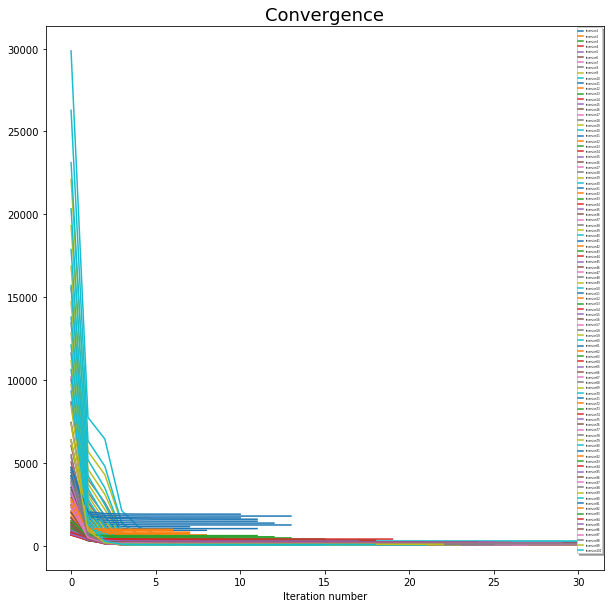

In [6]:
plt.figure(figsize=(10,10))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
for i, phi in enumerate(di['results']):
    plt.plot(phi[1], label='inversion%d' % (i+1))
plt.legend(loc=0, fontsize=2.5, shadow=bool, framealpha=1)

plt.savefig(mypath+'_tfa_convergence.png', dpi=300)
plt.show()

In [7]:
z0 = di['z0']
intensity = di['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = di['x'].size

In [8]:
matrix_gamma = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_gamma[i, j] = di['results'][i*n+j][1][-1]

In [9]:
matrix_phi = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_phi[i, j] = np.linalg.norm(di['results'][i*n+j][3])**2./N

In [10]:
mindex = np.argwhere(matrix_gamma<55.)
mindex

array([[0, 3],
       [1, 4],
       [1, 5],
       [2, 4],
       [2, 5],
       [3, 5],
       [3, 6],
       [4, 6],
       [4, 7],
       [5, 7],
       [6, 8],
       [7, 9]])

In [11]:
dots_z0 = []
dots_int = []
for re in mindex:
    print re[0]*10 + re[1]
    print matrix_gamma[re[0], re[1]]
    dots_int.append(np.linalg.norm(di['results'][re[0]*n + re[1]][2][0][0].props['magnetization']))
    dots_z0.append(di['results'][re[0]*n + re[1]][2][0][0].z1)

3
53.0226836462536
14
45.04143920186455
15
50.27894255650885
24
52.8047435887752
25
47.19415383308956
35
48.481114056546055
36
46.43563525387706
46
47.2609744128464
47
44.8172522074197
57
47.860563883300784
68
49.62746574434148
79
52.40252005843278


In [12]:
misdex = np.argwhere(matrix_phi<55)
misdex

array([[0, 3],
       [1, 4],
       [1, 5],
       [2, 4],
       [2, 5],
       [3, 5],
       [3, 6],
       [4, 5],
       [4, 6],
       [4, 7],
       [5, 6],
       [5, 7],
       [6, 7],
       [6, 8],
       [7, 8],
       [7, 9]])

In [13]:
for re in misdex:
    print re[0]*10 + re[1]
    print matrix_phi[re[0], re[1]]

3
49.183732046114784
14
34.01888300188029
15
35.58156996108463
24
44.76718974418753
25
34.673594712160785
35
40.41263601298621
36
33.40140112990532
45
54.57665193295679
46
38.341816656730636
47
34.51997083016146
56
51.494215954244304
57
40.04161371832099
67
51.019004865323495
68
42.17217132038887
78
53.13715401927906
79
44.926114068627584


In [14]:
H0 = (22768.*1e-9)/(4*np.pi*1e-7)
sus = intensity/H0

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


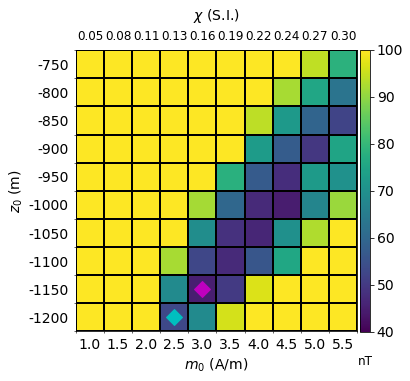

In [15]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
w = 3.
img = ax.imshow(matrix_gamma, vmin=40, vmax=100, origin='lower',extent=[0,w,0,w])
img.axes.tick_params(labelbottom='on',labeltop='off', labelleft="on", labelright='off',
    bottom='off', left='off', right='off',labelsize=14)
plt.ylabel('$z_0$ (m)', fontsize=14)
plt.xlabel('$m_0$ (A/m)', fontsize=14)
plt.plot(7*w/(2*n), w/(2*m), 'cD', markersize=12)
plt.plot(9*w/(2*n), 3*w/(2*m), 'mD', markersize=12)
#plt.plot(11*w/(2*n), 5*w/(2*m), 'wD', markersize=12)
#plt.plot(2.75, .75, 'wD', markersize=12)
#plt.plot(2.75, .75, 'Dc', markersize=12, linewidth=2)
x_label_list = []
y_label_list = []
sus_label_list = []
for xl, yl, sl in zip(intensity,z0,sus):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
    sus_label_list.append(str(sl)[:4])
ax.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, w, n+1), minor=True)
ax.set_yticks(np.linspace(0, w, m+1), minor=True)
clb = plt.colorbar(img, pad=0.01, aspect=30, shrink=0.865)
clb.ax.set_title('nT', pad=-315)
clb.ax.tick_params(labelsize=14)
ax2 = fig.add_axes(ax.get_position(), frameon=False)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax2.set_xticklabels(sus_label_list)
ax2.tick_params(labelbottom='off',labeltop='on', labelleft="off", labelright='off',
    bottom='off', left='off', right='off', labelsize=12)
ax2.set_title('$\chi$ (S.I.)', fontsize=14, pad=30)
ax.grid(which='minor', color='k', linewidth=2)
plt.draw()
ax2.set_position(ax.get_position())
plt.savefig(mypath+'gamma_grid.png', dpi=300, bbox_inches='tight')
plt.show()

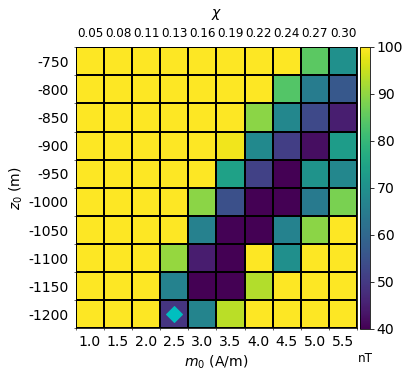

In [16]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
w = 3.
img = ax.imshow(matrix_phi, vmin=40, vmax=100, origin='lower',extent=[0,w,0,w])
img.axes.tick_params(labelbottom='on',labeltop='off', labelleft="on", labelright='off',
    bottom='off', left='off', right='off',labelsize=14)
plt.ylabel('$z_0$ (m)', fontsize=14)
plt.xlabel('$m_0$ (A/m)', fontsize=14)
plt.plot(7*w/(2*n), w/(2*m), 'cD', markersize=12)
#plt.plot(2.75, .75, 'wD', markersize=12)
#plt.plot(2.75, .75, 'Dc', markersize=12, linewidth=2)
x_label_list = []
y_label_list = []
sus_label_list = []
for xl, yl, sl in zip(intensity,z0,sus):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
    sus_label_list.append(str(sl)[:4])
ax.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, w, n+1), minor=True)
ax.set_yticks(np.linspace(0, w, m+1), minor=True)
clb = plt.colorbar(img, pad=0.01, aspect=30, shrink=0.865)
clb.ax.set_title('nT', pad=-315)
clb.ax.tick_params(labelsize=14)
ax2 = fig.add_axes(ax.get_position(), frameon=False)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax2.set_xticklabels(sus_label_list)
ax2.tick_params(labelbottom='off',labeltop='on', labelleft="off", labelright='off',
    bottom='off', left='off', right='off', labelsize=12)
ax2.set_title('$\chi$', fontsize=14, pad=30)
ax.grid(which='minor', color='k', linewidth=2)
plt.draw()
ax2.set_position(ax.get_position())
plt.savefig(mypath+'phi_grid.png', dpi=300, bbox_inches='tight')
plt.show()

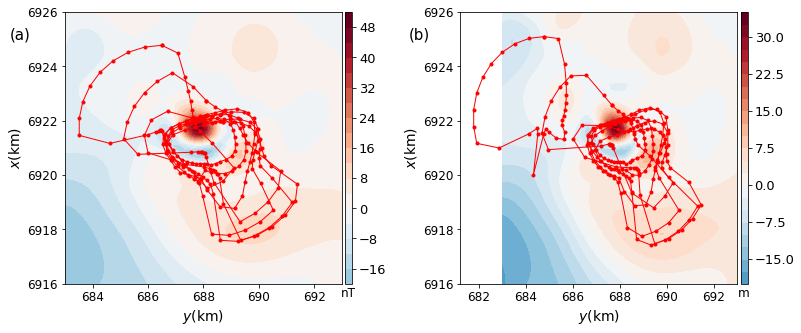

In [17]:
plt.figure(figsize=(13,5))

ax=plt.subplot(1,2,1)
plt.tricontourf(di['y'], di['x'], di['results'][3][3], 20,
                cmap='RdBu_r', vmin=-np.max(di['results'][3][3]),
                vmax=np.max(di['results'][3][3])).ax.tick_params(labelsize=12)
for di1 in di['results'][3][2][-1]:
    mpl.polygon(di1, '.-r', xy2ne=True)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT', pad=-285)
ax.text(681000, 6925000, '(a)', fontsize= 15)
mpl.m2km()

ax=plt.subplot(1,2,2)
plt.tricontourf(di['y'], di['x'], di['results'][14][3], 20,
                cmap='RdBu_r', vmin=-np.max(di['results'][14][3]),
                vmax=np.max(di['results'][14][3])).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
for di2 in di['results'][14][2][-1]:
    mpl.polygon(di2, '.-r', xy2ne=True)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-285)
clb.ax.tick_params(labelsize=13)
ax.text(679000, 6925000, '(b)', fontsize= 15)
mpl.m2km()

plt.savefig(mypath+'projections.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversion 4 (red triangle)

In [18]:
x = di['x']/1000.
y = di['y']/1000.
z = di['z']/1000.

for i in range(len(di['results'][3][2][0])):
    di['results'][3][2][-1][i].x /= 1000.
    di['results'][3][2][-1][i].y /= 1000.
    di['results'][3][2][-1][i].z1 /= 1000.
    di['results'][3][2][-1][i].z2 /= 1000.
    di['results'][3][2][0][i].x /= 1000.
    di['results'][3][2][0][i].y /= 1000.
    di['results'][3][2][0][i].z1 /= 1000.
    di['results'][3][2][0][i].z2 /= 1000.

In [19]:
verts3 = mfun.plot_prisms(di['results'][3][2][-1])
verts_initial3 = mfun.plot_prisms(di['results'][3][2][0])

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


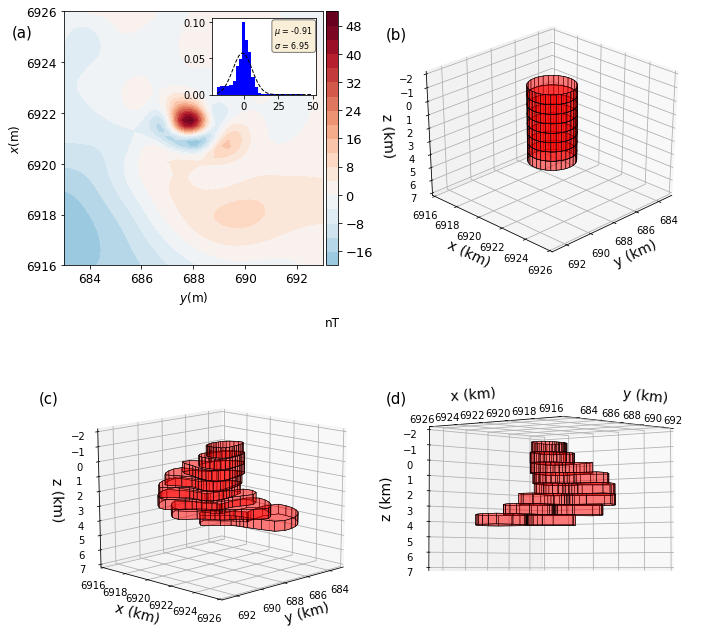

In [20]:
plt.figure(figsize=(10,9))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['results'][3][3], 20,
                cmap='RdBu_r', vmin=-np.max(di['results'][3][3]),
                vmax=np.max(di['results'][3][3])).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=12)
plt.ylabel('$x$(m)', fontsize=12)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][3][3])
std = np.std(di['results'][3][3])
nbins=30
n, bins, patches = plt.hist(di['results'][3][3],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.6, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=8,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(681000, 6925000, '(a)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
# ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
#  facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(30, 45)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
#  facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(15, 45)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(-3, -140)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversion 14 (magenta Diamond)

In [21]:
for i in range(len(di['results'][14][2][0])):
    di['results'][14][2][-1][i].x /= 1000.
    di['results'][14][2][-1][i].y /= 1000.
    di['results'][14][2][-1][i].z1 /= 1000.
    di['results'][14][2][-1][i].z2 /= 1000.
    di['results'][14][2][0][i].x /= 1000.
    di['results'][14][2][0][i].y /= 1000.
    di['results'][14][2][0][i].z1 /= 1000.
    di['results'][14][2][0][i].z2 /= 1000.

In [22]:
verts14 = mfun.plot_prisms(di['results'][14][2][-1])
verts_initial14 = mfun.plot_prisms(di['results'][14][2][0])

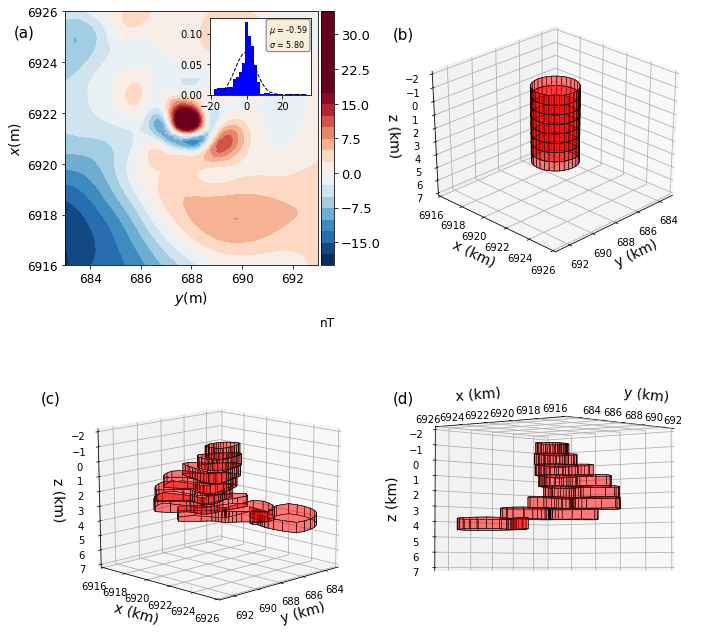

In [23]:
plt.figure(figsize=(10,9))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['results'][14][3], 20,
                cmap='RdBu_r', vmin=np.min(di['results'][14][3]),
                vmax=np.min(di['results'][14][3])*(-1)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=14)
plt.ylabel('$x$(m)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][14][3])
std = np.std(di['results'][14][3])
nbins=30
n, bins, patches = plt.hist(di['results'][14][3],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.58, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=8,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(681000, 6925000, '(a)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
# ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
#  facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(30, 45)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial14, alpha=0.1, 
#  facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(15, 45)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial14, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(-3, -140)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results2.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversions 4 and 15

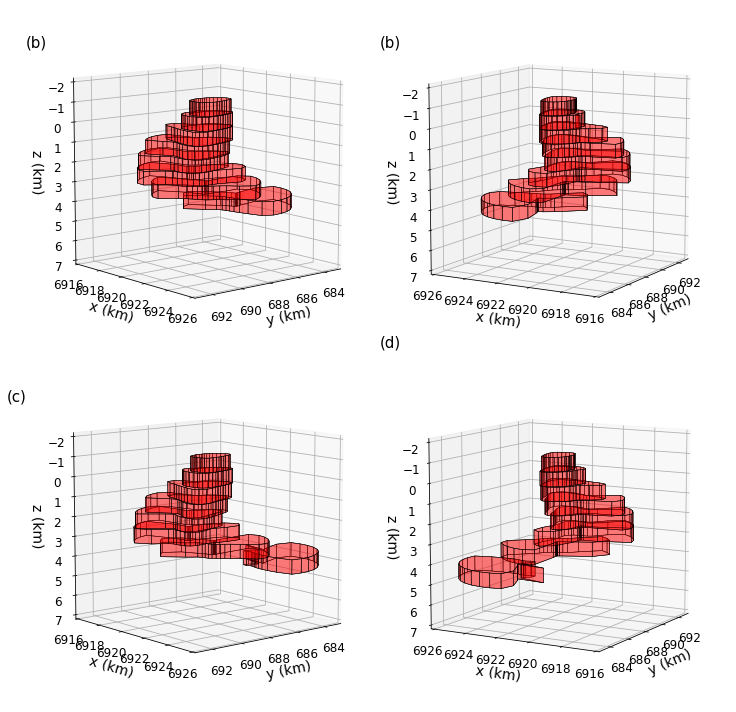

In [24]:
plt.figure(figsize=(10,10))

# initial approximate
ax = plt.subplot(2,2,1, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
#ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 12)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
#ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 12)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, -150)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.1, 
#  facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 12)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 12)
ax.set_ylabel('x (km)', fontsize= 14)
ax.set_xlabel('y (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, -150)
ax.text2D(-0.1, 0.1, '(d)', fontsize= 15)

plt.tight_layout()
#plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculating the momentum

In [25]:
volume3 = mfun.volume_polygon(di['results'][3][2][-1])
volume14 = mfun.volume_polygon(di['results'][14][2][-1])
momentum3 = volume3*np.linalg.norm(di['results'][3][2][0][0].props['magnetization'])
momentum14 = volume14*np.linalg.norm(di['results'][14][2][0][0].props['magnetization'])


In [26]:
volume3

52.88662827713674

In [27]:
volume14

48.368156516221546

In [28]:
momentum3

132.21657069284186

In [29]:
momentum14

145.10446954866464

In [30]:
di['results'][3][0][-1]

679.2939664035558

In [31]:
di['results'][3][0][-1]*len(di['results'][3][2][0])

5434.351731228447

In [32]:
di['results'][14][0][-1]

713.6501608862093

In [33]:
di['results'][14][0][-1]*len(di['results'][14][2][0])

5709.201287089674

# Plot all solutions